In [1]:
from scipy.stats import bernoulli, uniform
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 100000
num_trials = 10 # we take the average allocations across trials
def run_repeated_fisher_market(n, bid_distribution):
    ideal_utility_fractions = []
    for trial in range(num_trials):
        alpha = np.ones(n) / n # symmetric agents
        budgets = T * alpha
        allocations = np.zeros(n)
        for t in range(T):
            values = bernoulli.rvs(alpha) # bernoulli values
            bids = np.minimum(budgets, values * bid_distribution())
            if np.any(bids): # check if someone has bid nonzero
                max_bid = np.max(bids)
                winner = np.argmax(bids)
                budgets[winner] -= max_bid
                allocations[winner] += 1
        ideal_utility_fractions.append(allocations[0] / (alpha[0] * T)) # utility of agent 0 / ideal utility
    return ideal_utility_fractions

### The following code takes about a half hour to run

In [3]:
num_agents = list(range(2, 31))
determinstic_bid_allocations = np.array([run_repeated_fisher_market(n, lambda: 2) for n in num_agents])
uniform_bid_allocations = np.array([run_repeated_fisher_market(n, lambda: uniform.rvs(loc=0, scale=1+np.sqrt(2), size=n)) for n in num_agents])

In [4]:
determinstic_bid_mean_allocations = np.mean(determinstic_bid_allocations, axis=1)
uniform_bid_mean_allocations = np.mean(uniform_bid_allocations, axis=1)
determinstic_bid_std_allocations = np.std(determinstic_bid_allocations, axis=1, ddof=1)
uniform_bid_std_allocations = np.std(uniform_bid_allocations, axis=1, ddof=1)
determinstic_bid_mean_std_allocations = determinstic_bid_std_allocations / np.sqrt(num_trials)
uniform_bid_mean_std_allocations = uniform_bid_std_allocations / np.sqrt(num_trials)

In [5]:
num_agents = np.array(num_agents)
upper_bound = 1-(1 - 1/num_agents)**num_agents

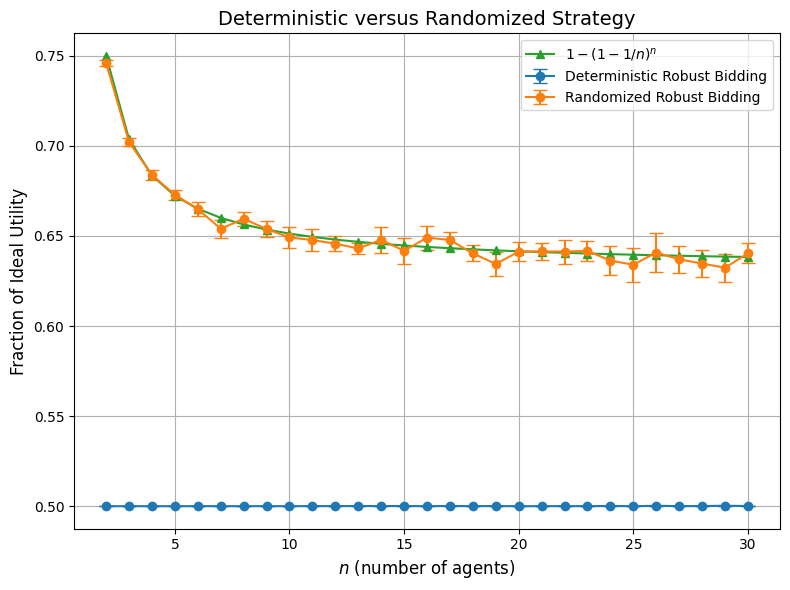

In [6]:
# Create the plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.errorbar(
    num_agents,
    determinstic_bid_mean_allocations,
    yerr=2*determinstic_bid_mean_std_allocations,
    marker='o',
    label='Deterministic Robust Bidding',
    capsize=5
)
plt.errorbar(
    num_agents,
    uniform_bid_mean_allocations,
    yerr=2*uniform_bid_mean_std_allocations,
    marker='o',
    label='Randomized Robust Bidding',
    capsize=5
)
plt.plot(num_agents, upper_bound, label=r'$1 - (1 - 1/n)^n$', marker='^')

# Add labels and a legend
plt.xlabel(r'$n$ (number of agents)', fontsize=12)
plt.ylabel('Fraction of Ideal Utility', fontsize=12)
plt.title('Deterministic versus Randomized Strategy', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)  # Add a grid for better readability

# Show the plot
plt.tight_layout()
plt.savefig('everyone_uses_robust_strategy-hardness.png', dpi=300, bbox_inches='tight')
plt.show()